In [1]:
import os, sys, time, resource, re, gc, shutil
from multiprocess import Pool
from functools import partial
from tabulate import tabulate
from urllib.parse import urlparse, parse_qsl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mongoengine.queryset.visitor import Q
import django
from django.db.models import Count
sys.path.append('/home/galm/software/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
from django.db.models import F

In [2]:
dts = DocTopic.objects.filter(run_id=63).values('topic__title')

dts = dts.annotate(
    wos = models.Sum(
        models.Case(
            models.When(doc__wos=True,then=F('score')),default=0, output_field=models.FloatField()
        )
    ),
    scopus = models.Sum(
        models.Case(
            models.When(doc__scopus=True,then=F('score')),default=0, output_field=models.FloatField()
        )
    ),
    total = models.Sum('score')
)
df =  pd.DataFrame.from_dict(list(dts))

In [3]:
df['wos_pcnt'] = df.wos/df.total*100
df['scopus_pcnt'] = df.scopus/df.total*100
df = df.sort_values(by='scopus_pcnt', ascending=0).reset_index(drop=True)
df.head()

,scopus,topic__title,total,wos,wos_pcnt,scopus_pcnt
0,491.819716,"{emiss, ghg, greenhous}",513.408862,282.860719,55.094631,95.794941
1,225.570564,"{vehicl, electr, transport}",237.329133,91.558281,38.578610,95.045459
2,606.438547,"{climat, chang, impact}",638.268076,412.911409,64.692474,95.013141
3,321.887900,"{fuel, engin, hydrogen}",339.630939,142.983700,42.099728,94.775788
4,368.606749,"{power, electr, generat}",390.245701,161.301073,41.333209,94.455044


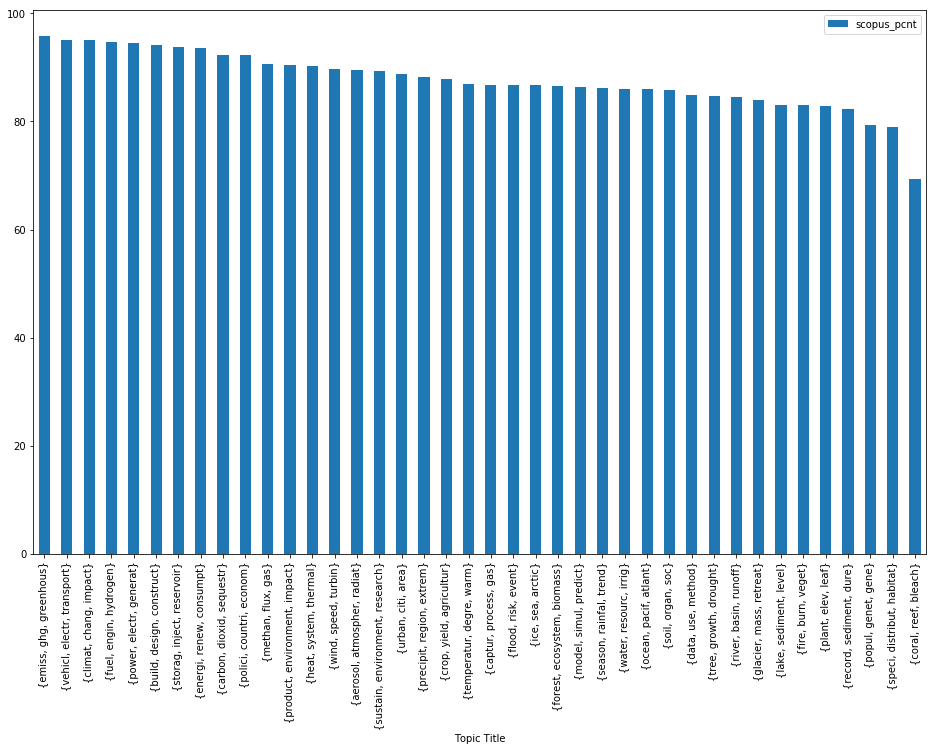

In [4]:
plt.rcParams["figure.figsize"] = [16,10]
bdf = df.set_index(['topic__title'])[['scopus_pcnt']]
bdf.plot.bar();
plt.xlabel('Topic Title')
plt.savefig('../plots/scopus_topics.png',bbox_inches='tight')   
plt.show()

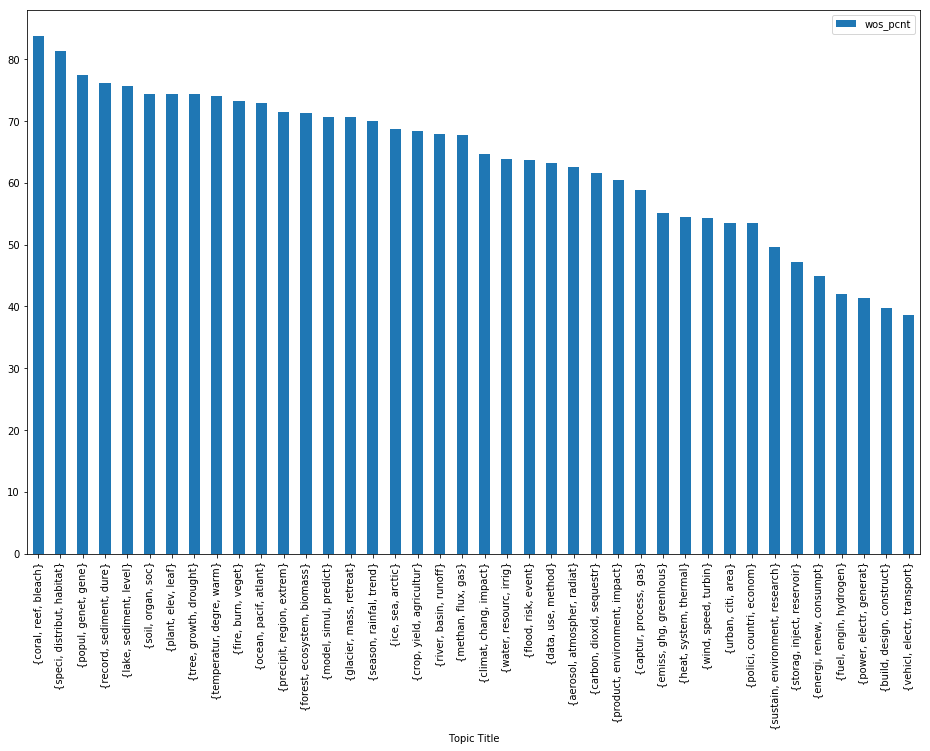

In [5]:
plt.rcParams["figure.figsize"] = [16,10]
bdf = df.set_index(['topic__title'])[['wos_pcnt']].sort_values(by='wos_pcnt', ascending=0)
bdf.plot.bar();
plt.xlabel('Topic Title')
plt.savefig('../plots/scopus_topics.png',bbox_inches='tight')   
plt.show()